In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from dotenv import dotenv_values,load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

In [3]:
ENV = dotenv_values(".env")
load_dotenv(override=False)

True

In [4]:
# importing or loading the dataset
df= pd.read_csv(os.environ['DATASETS_PATH'] + '/wine.csv')

df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.keys()

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [7]:
col_names = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline','Customer_Segment']#debe ser formato numpy array
X = df[col_names]
X = X.values
print(type(X))
len(X)
y = df[col_names]
y = y.values

<class 'numpy.ndarray'>


In [8]:
df_describe = df[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline','Customer_Segment']]
df_describe.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

 + mean = Media es el promedio de los datos
 + std = La desviación estándar mide la dispersión de una distribución de datos
 + 25% = El primer cuartil Q1, es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
 + 50% = El segundo cuartil Q2 es el valor por debajo del cual queda el 50% de los datos (Mediana)
 + 75% =el tercer cuartil Q3 es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
 + MAX y Min : valores mayor y menor 



# # Analisis Univariado

# Alcohol nivel

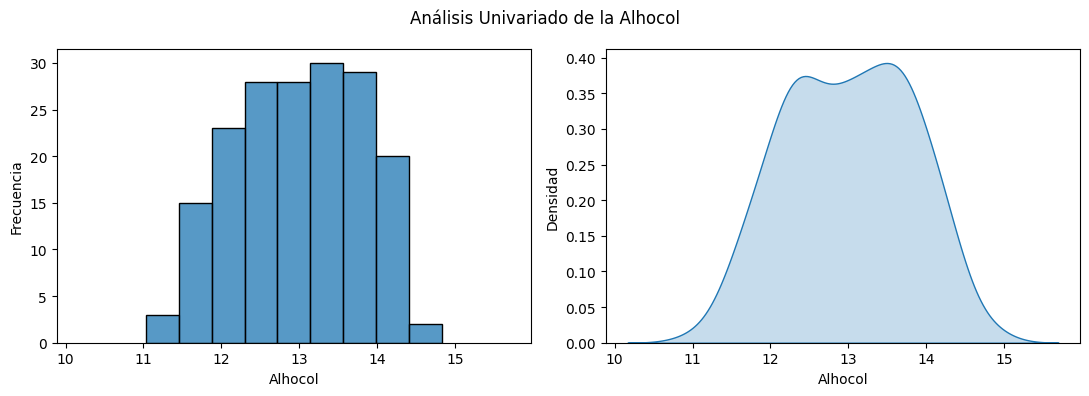

In [21]:
var = 'Alcohol'
var_title = 'Alhocol'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Nivel ácido

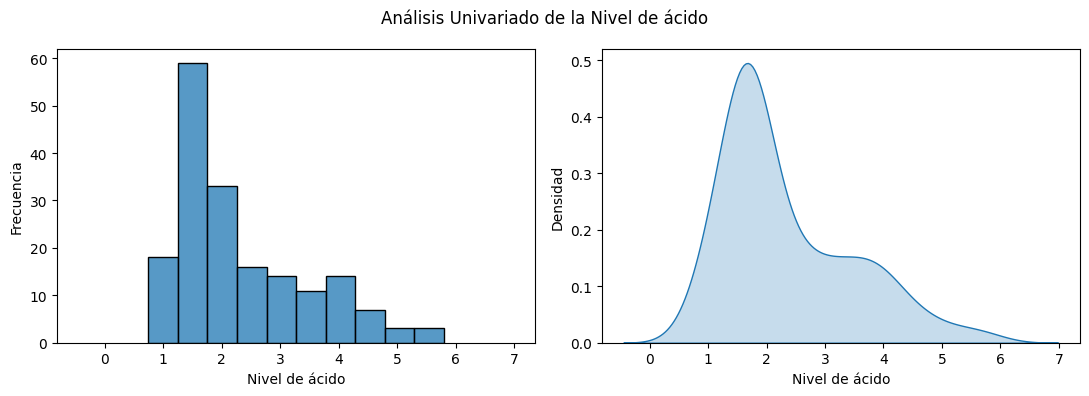

In [24]:
var = 'Malic_Acid'
var_title = 'Nivel de ácido'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# ASH Level

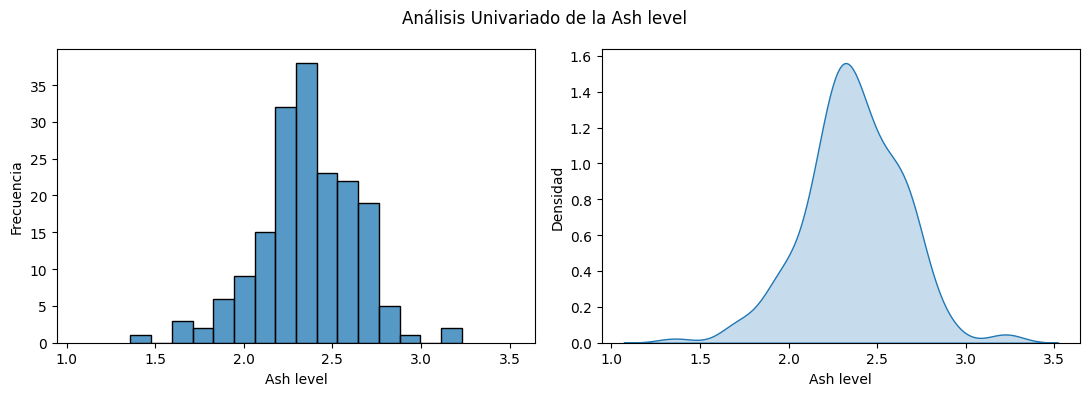

In [26]:
var = 'Ash'
var_title = 'Ash level'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Ash alcalinidad

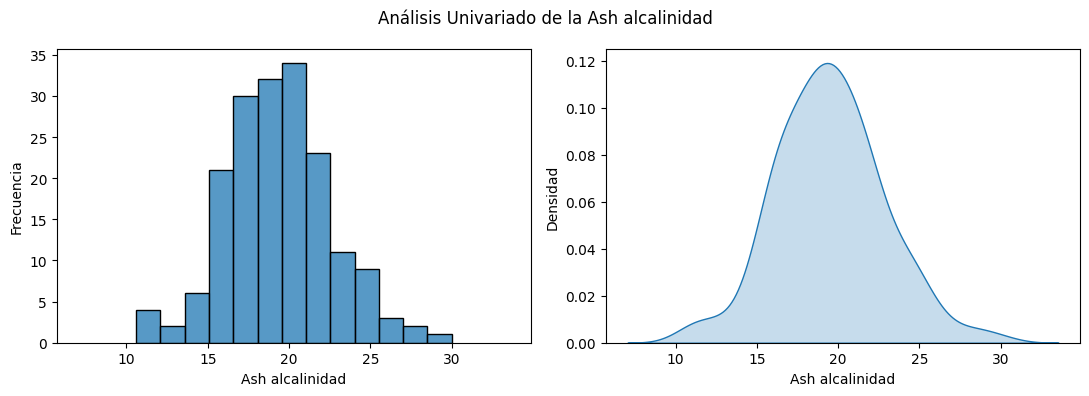

In [31]:
var = 'Ash_Alcanity'
var_title = 'Ash alcalinidad'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

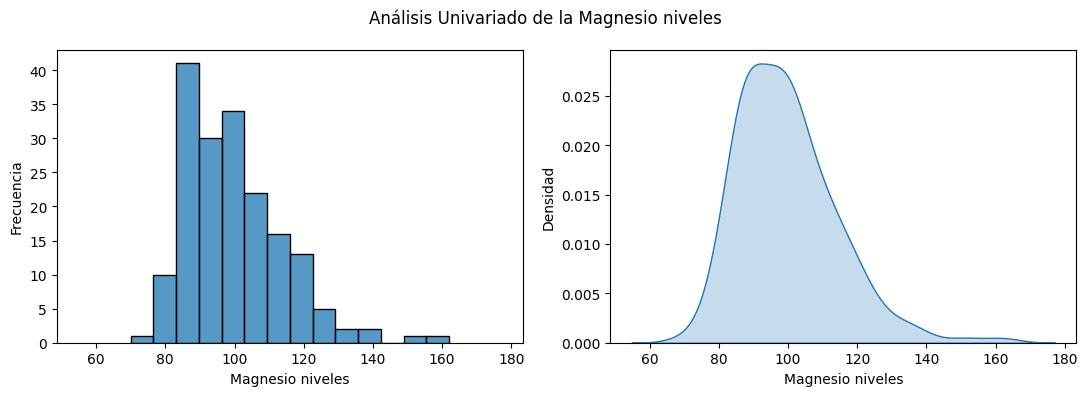

In [32]:
var = 'Magnesium'
var_title = 'Magnesio niveles'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Nivel Magnesio

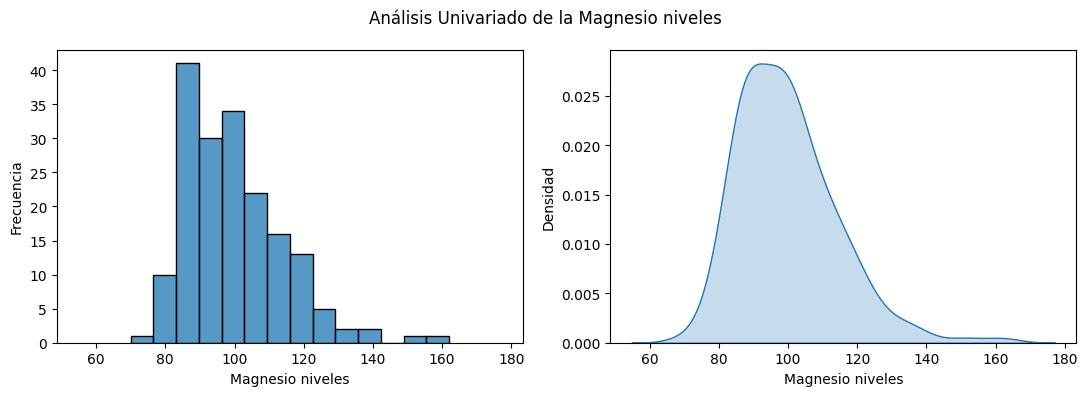

In [34]:
var = 'Magnesium'
var_title = 'Magnesio niveles'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Fenoles totales

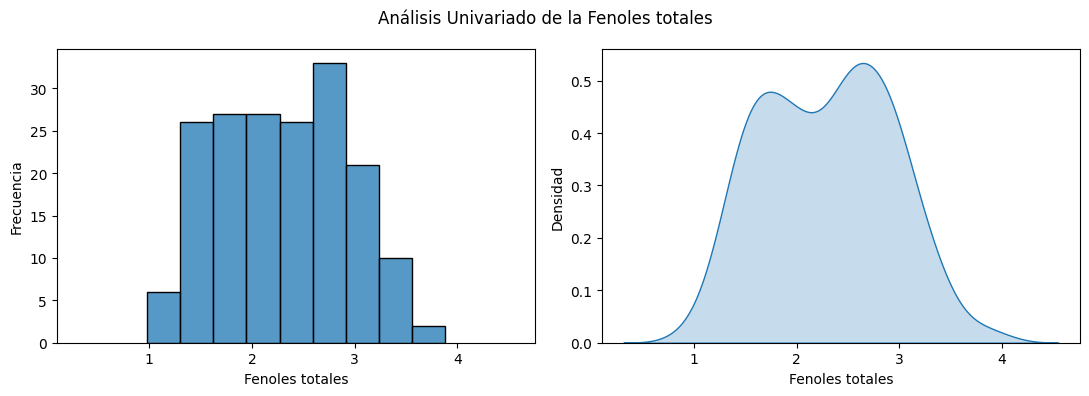

In [6]:
var = 'Total_Phenols'
var_title = 'Fenoles totales'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Flavonoides

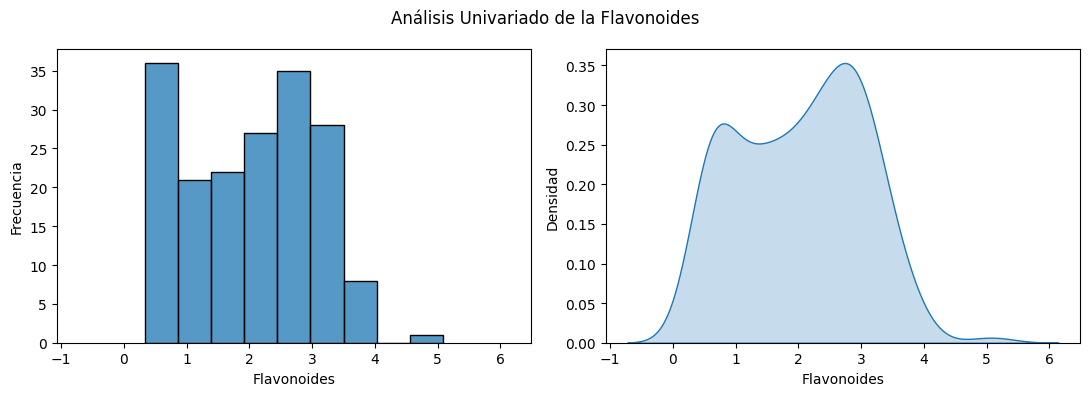

In [39]:
var = 'Flavanoids'
var_title = 'Flavonoides'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# No flavonoides Fenoles

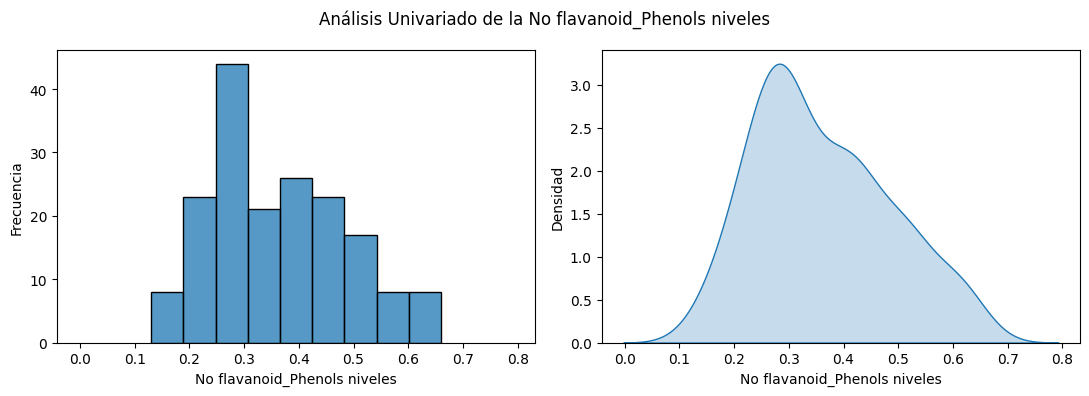

In [40]:
var = 'Nonflavanoid_Phenols'
var_title = 'No flavanoid_Phenols niveles'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Proantocianinas

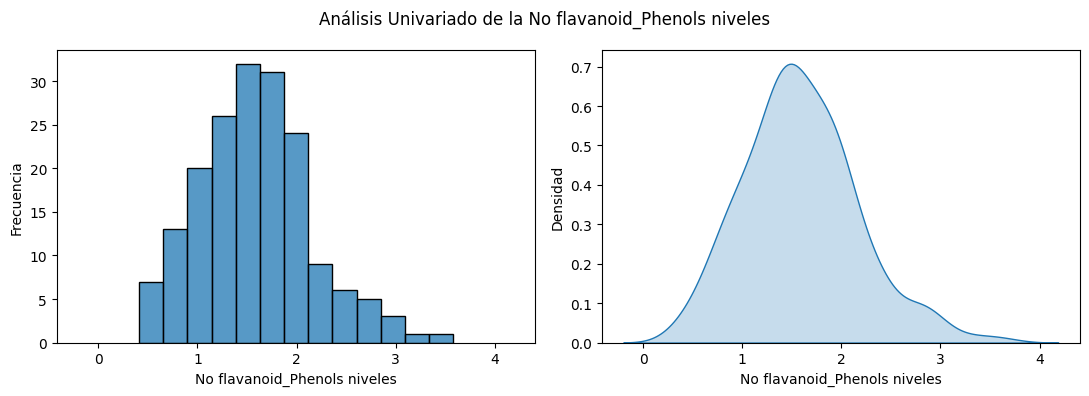

In [42]:
var = 'Proanthocyanins'
var_title = 'No flavanoid_Phenols niveles'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Color_Intensity

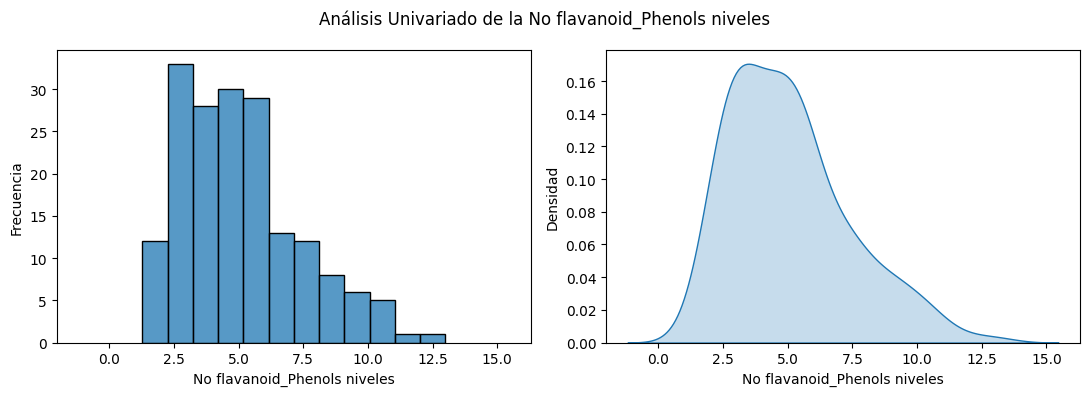

In [44]:
var = 'Color_Intensity'
var_title = 'No flavanoid_Phenols niveles'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Proline

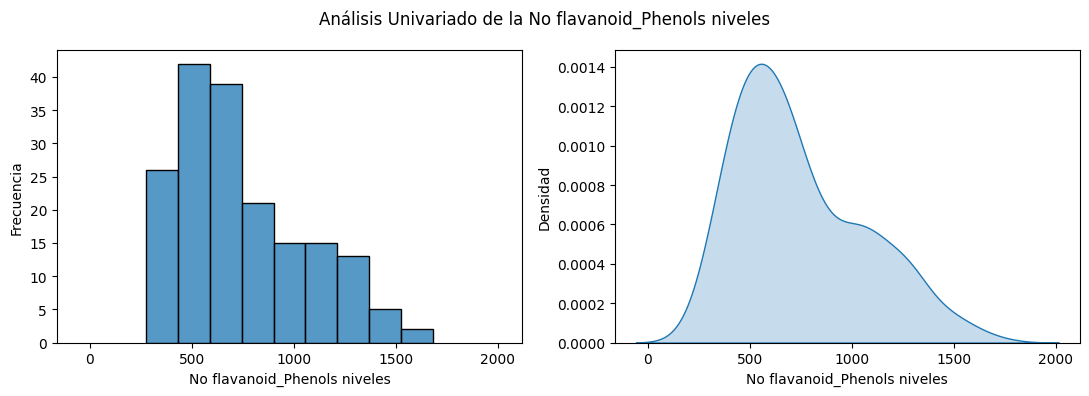

In [45]:
var = 'Proline'
var_title = 'No flavanoid_Phenols niveles'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Customer_Segment

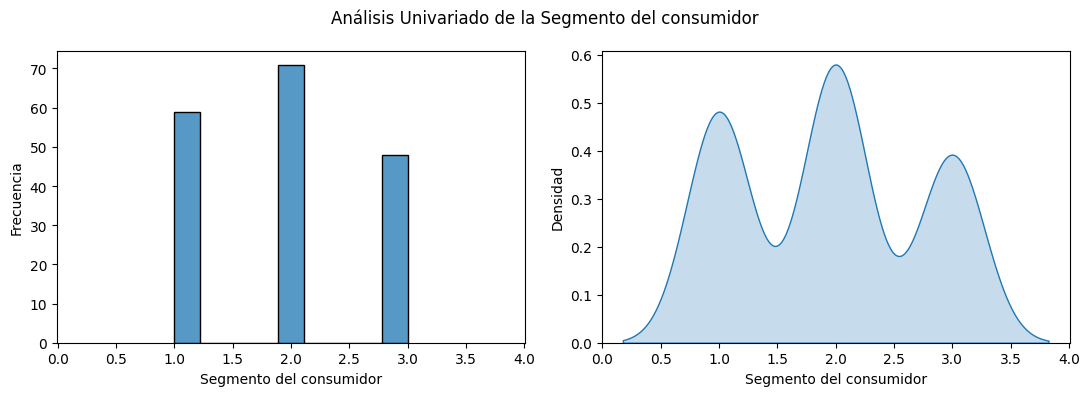

In [46]:
var = 'Customer_Segment'
var_title = 'Segmento del consumidor'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Analisis Multivariado

Niveles de Alcohol

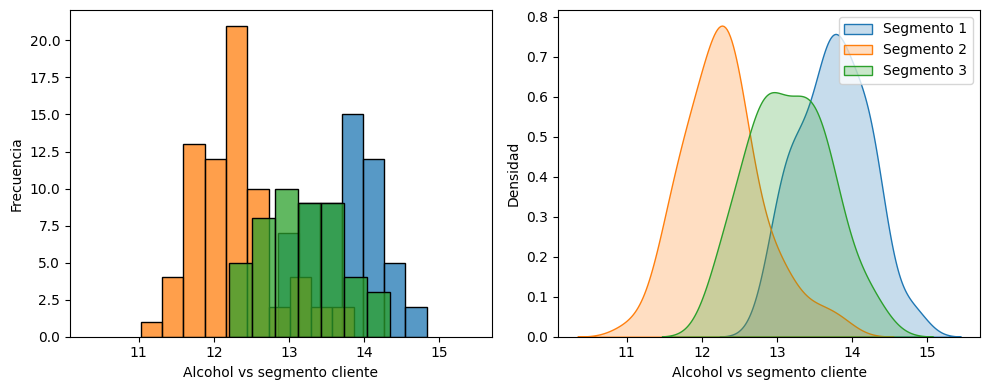

In [51]:
#Longitud del Sépalo vs Especies
var = 'Alcohol'
var_title = 'Alcohol vs segmento cliente'

filter = df['Customer_Segment'] == 1
df_segment_1 = df.loc[filter]

filter = df['Customer_Segment'] == 2
df_segment_2 = df.loc[filter]

filter = df['Customer_Segment'] == 3
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Ash_Alcanity

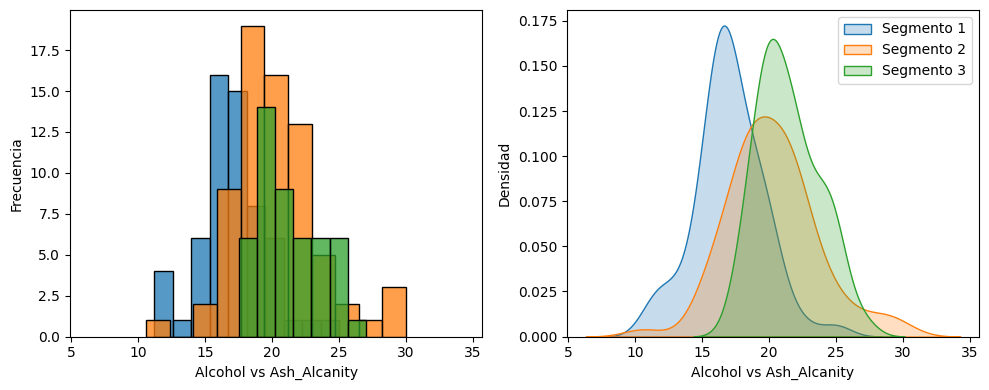

In [52]:
#Longitud del Sépalo vs Especies
var = 'Ash_Alcanity'
var_title = 'Alcohol vs Segmento'

filter = df['Customer_Segment'] == 1
df_segment_1 = df.loc[filter]

filter = df['Customer_Segment'] == 2
df_segment_2 = df.loc[filter]

filter = df['Customer_Segment'] == 3
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Magnesium

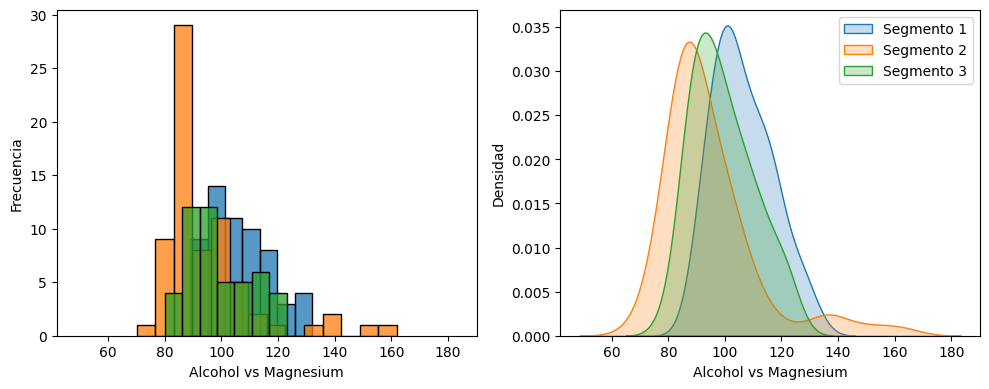

In [53]:
#Longitud del Sépalo vs Especies
var = 'Magnesium'
var_title = 'Magnesium vs Segmento'

filter = df['Customer_Segment'] == 1
df_segment_1 = df.loc[filter]

filter = df['Customer_Segment'] == 2
df_segment_2 = df.loc[filter]

filter = df['Customer_Segment'] == 3
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Flavanoids

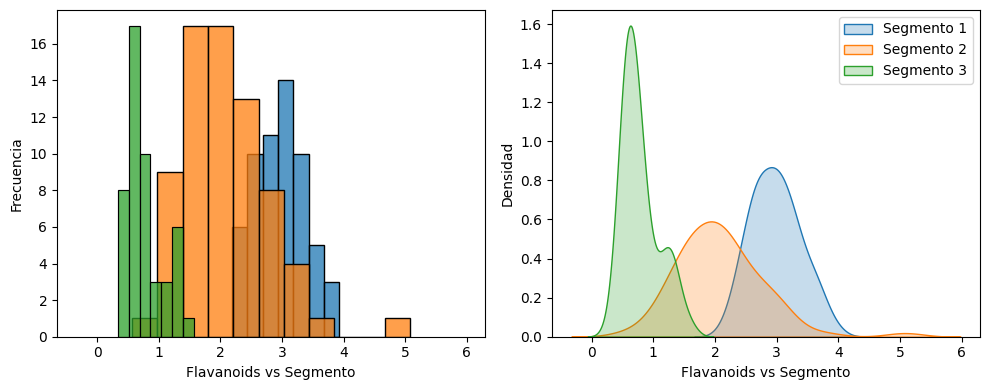

In [54]:
#Longitud del Sépalo vs Especies
var = 'Flavanoids'
var_title = 'Flavanoids vs Segmento'

filter = df['Customer_Segment'] == 1
df_segment_1 = df.loc[filter]

filter = df['Customer_Segment'] == 2
df_segment_2 = df.loc[filter]

filter = df['Customer_Segment'] == 3
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Color_Intensity

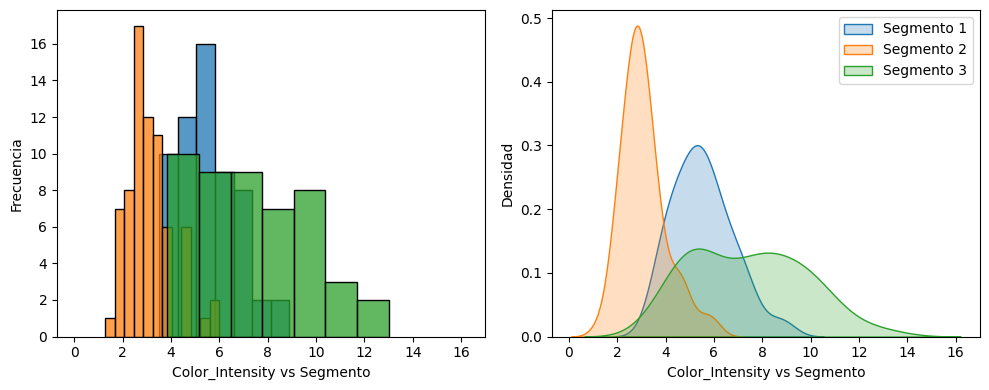

In [55]:
#Longitud del Sépalo vs Especies
var = 'Color_Intensity'
var_title = 'Color_Intensity vs Segmento'

filter = df['Customer_Segment'] == 1
df_segment_1 = df.loc[filter]

filter = df['Customer_Segment'] == 2
df_segment_2 = df.loc[filter]

filter = df['Customer_Segment'] == 3
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

# Planos de dispersión

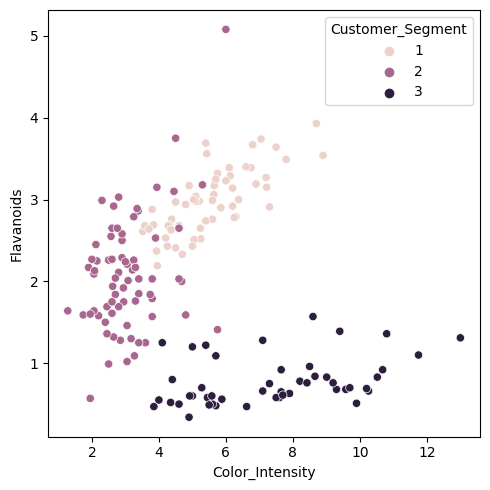

In [58]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Color_Intensity", y="Flavanoids", ax=ax, hue="Customer_Segment")
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


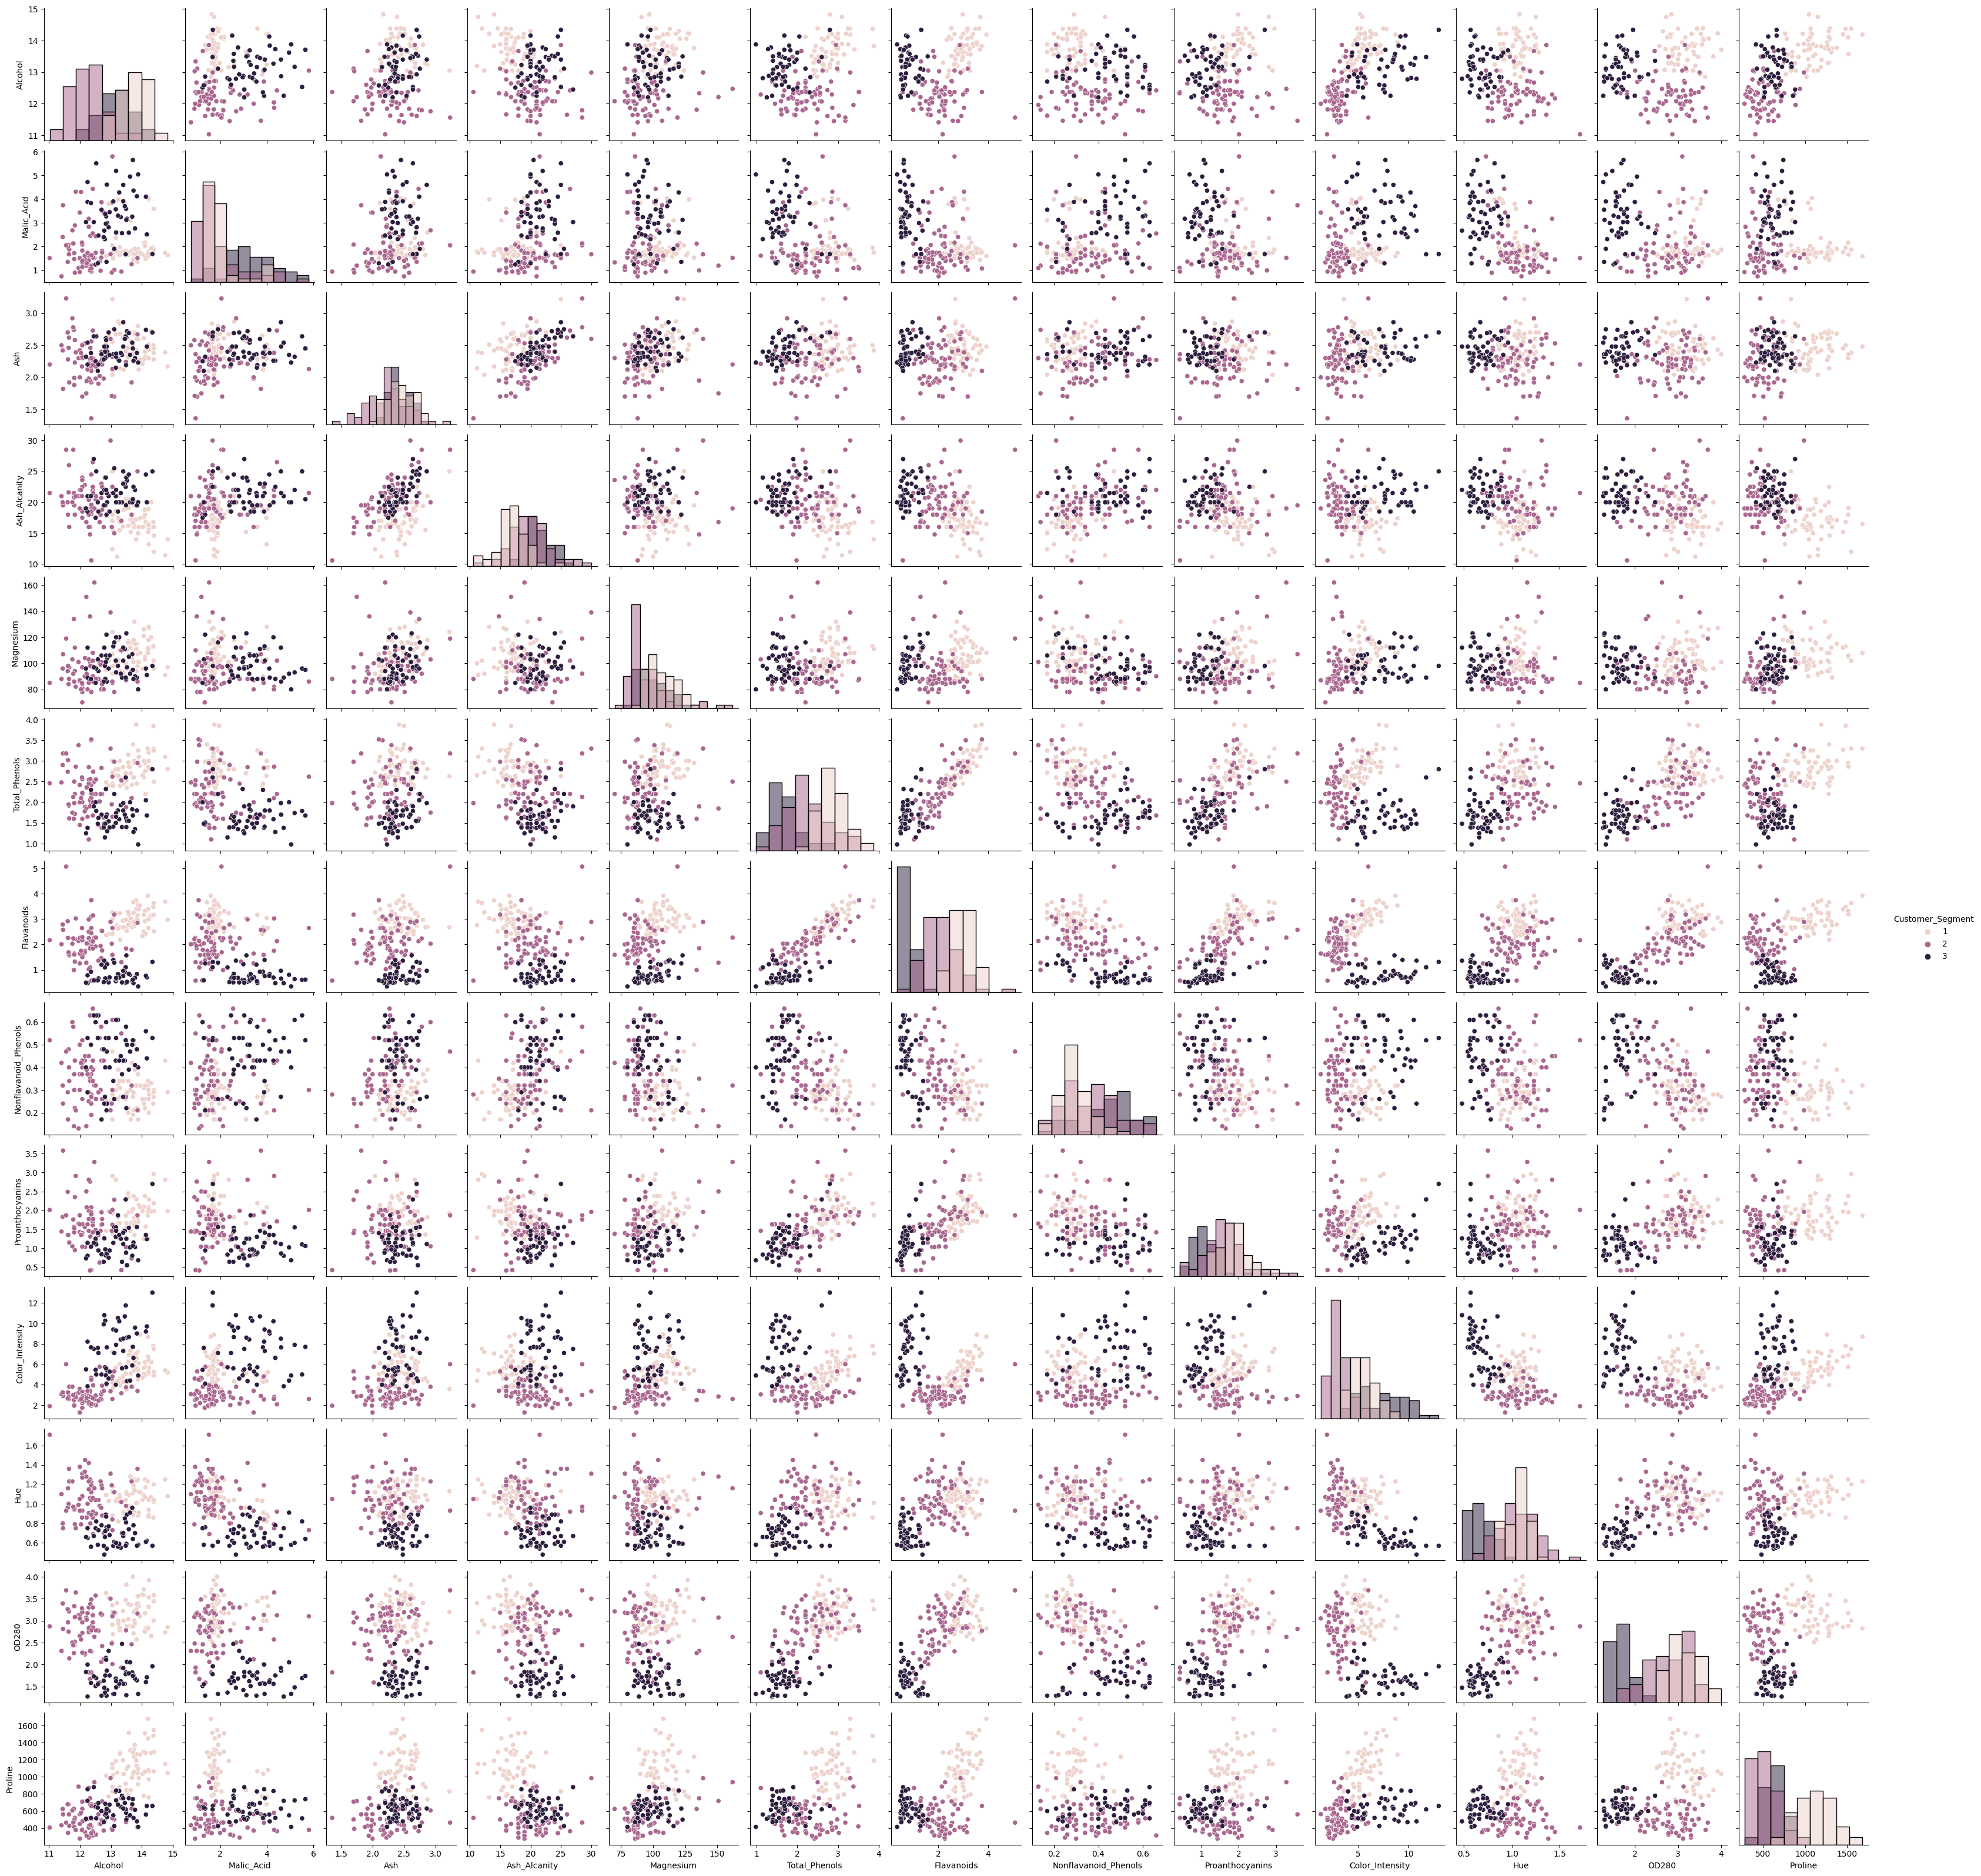

In [59]:
#Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos
df_test = df[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline','Customer_Segment']]
sns.pairplot(df_test, hue="Customer_Segment", diag_kind="hist")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


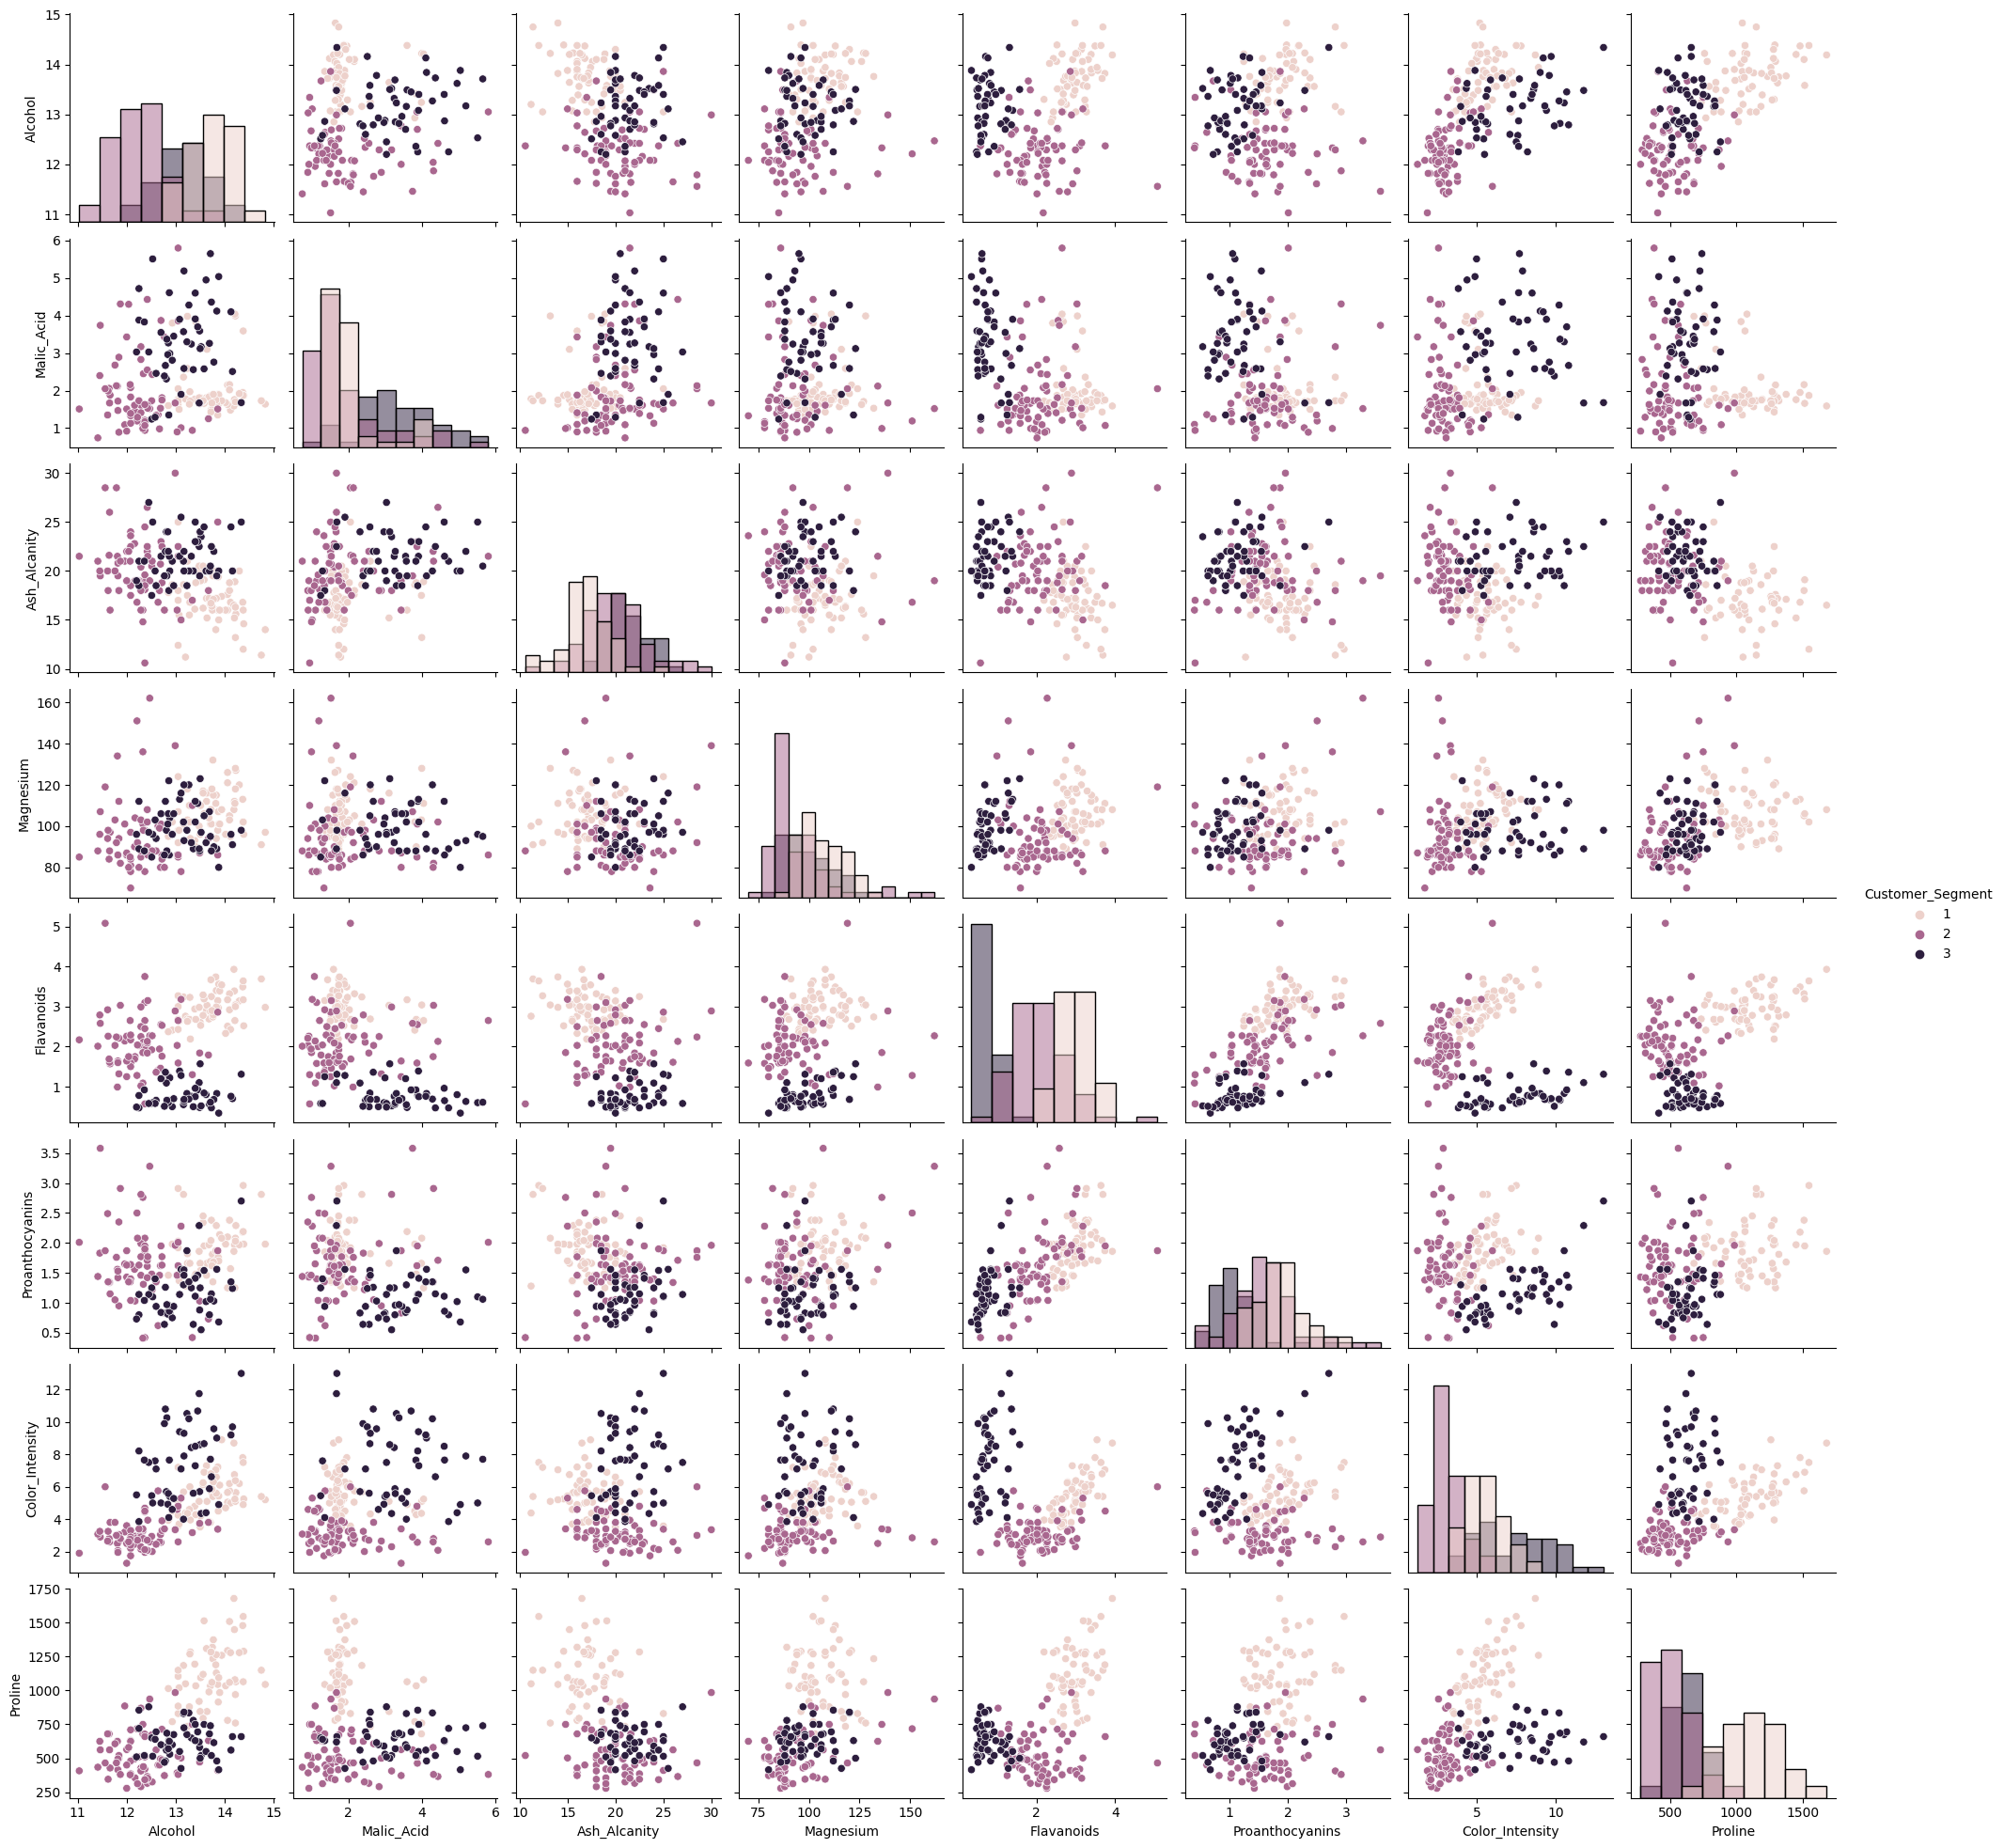

In [62]:
#Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos
df_test = df[['Alcohol','Malic_Acid','Ash_Alcanity','Magnesium','Flavanoids','Proanthocyanins','Color_Intensity','Proline','Customer_Segment']]
sns.pairplot(df_test, hue="Customer_Segment", diag_kind="hist")

# Correlación

In [75]:
df_correlation = df[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline','Customer_Segment']]
df_correlation.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   
Customer_Segment     -0.328222    0.437776 -0.049643      0.517859  -0.209179   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   
Customer_Segment          -0.719163   -0.847498              0.489109   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   
Customer_Segment            -0.499130         0.265668 -0.617369 -0.788230   

                       Proline  Customer_Segment  
Alcohol               0.643720         -0.328222  
Malic_Acid           -0.192011          0.437776  
Ash                   0.223626         -0.049643  
Ash_Alcanity         -0.440597          0.517859  
Magnesium             0.393351         -0.209179  
Total_Phenols         0.498115         -0.719163  
Flavanoids            0.494193         -0.847498  
Nonflavanoid_Phenols -0.311385          0.489109  
Proanthocyanins       0.330417         -0.499130  
Color_Intensity       0.316100

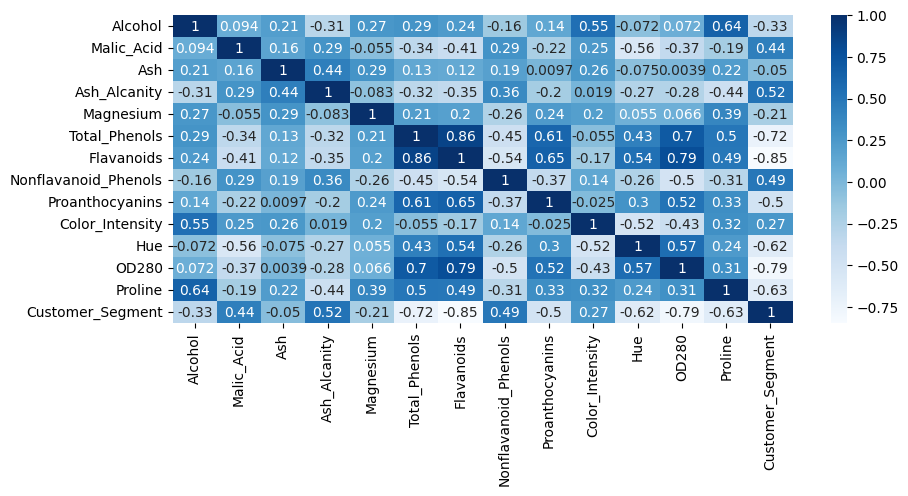

In [79]:
fig = plt.figure(figsize = (10,4))
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);

# numero de componentes

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
sc = StandardScaler()
#datos estandarizados
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
#numero de componentes
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train)
X_test_std = pca.transform(X_test)

In [30]:
#el acumulado de varianza explicada en las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[9.98321963e-01 1.50823632e-03 9.44326614e-05 4.57526319e-05
 1.35332109e-05 8.59588843e-06 2.61340228e-06 1.55110651e-06
 1.22330376e-06]
suma 0.9999979011258479


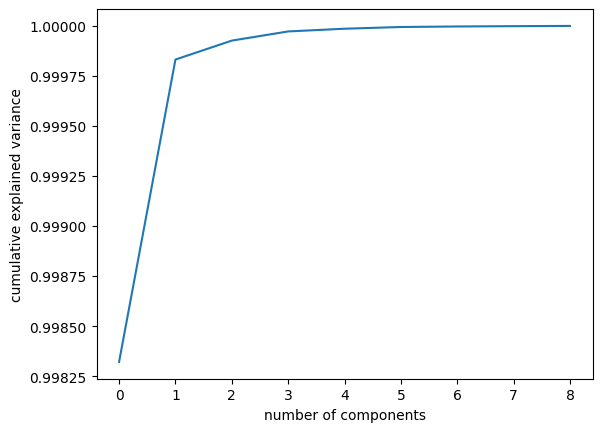

In [31]:
#graficar el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [32]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

df_pca = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2'])

df_pca

PC1        PC2
0    512.271234 -14.157424
1   -407.400826  14.849549
2    -72.536213   2.231210
3   -360.729797  -8.100912
4   -372.758464  -7.729010
..          ...        ...
119  342.422111  -4.490753
120   42.723923  16.386901
121  132.539153   4.960527
122 -202.680314  -4.523750
123   92.699995  14.539522

[124 rows x 2 columns]

In [33]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[0.99832196 0.00150824]
suma 0.999830198920611


In [34]:
X_test_pca

array([[-2.57871155e+02, -1.56087538e+01],
       [ 1.85408740e+02,  5.91459029e+01],
       [-3.42772214e+02, -8.09245436e+00],
       [ 1.62523482e+02,  4.55321031e+00],
       [ 8.77445235e+01,  1.87965755e+01],
       [ 4.42267384e+02, -1.40675256e+01],
       [-3.27648732e+01, -1.02342123e+01],
       [-1.62556643e+02,  3.96066243e+00],
       [-1.22378745e+02,  1.43566926e+01],
       [ 6.22598325e+02,  5.05022973e+00],
       [-1.22646465e+02, -3.89095104e+00],
       [-2.72336551e+02,  1.66900644e+01],
       [-1.90742201e+02, -8.77547896e+00],
       [ 3.07696946e+02,  1.31069864e+01],
       [-8.08136301e+01, -1.34799164e+01],
       [-1.12507170e+02,  5.03097457e+00],
       [-1.27623951e+02, -1.73557355e+00],
       [ 1.27325774e+02, -4.60787423e+00],
       [ 7.57411197e+02, -7.09476826e+00],
       [ 5.67185756e+02, -2.00836062e+01],
       [-2.82751416e+02, -9.22151139e+00],
       [-4.40638638e+02, -7.16870046e-01],
       [-3.87521016e+02,  8.66591733e+00],
       [-2.

# Reconstruir datos

In [32]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_
list_pc = []
for index in range(1,len(modelo_pca.components_) + 1):
    list_pc.append('PC'+str(index))
#modelo_pca.components_

In [33]:
proyecciones = np.dot(modelo_pca.components_, scale(df).T)
proyecciones = pd.DataFrame(proyecciones)
proyecciones = proyecciones.transpose().set_index(df.index)
proyecciones.head()

0         1         2         3         4         5         6   \
0 -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876   
1 -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309 -0.029716   
2 -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842  0.488305   
3 -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616 -0.398364   
4 -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762  0.447876   

         7         8         9         10        11        12        13  
0  0.055637 -0.458765  1.065570 -0.420494  0.552928 -0.302978  0.200857  
1  1.010372  0.218806 -0.020182 -0.130020  0.394971 -0.146645  0.126402  
2 -0.268957  1.222769 -0.106249 -0.279074  0.001898  0.021278 -0.055752  
3  0.618844 -0.114658  0.107671  0.773866 -0.230929 -0.501277  0.019903  
4  0.434937 -0.261548  0.112434 -0.537931 -0.226686  0.274109 -0.517498

In [35]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
df_recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df.columns,
)
print('------------------')
print('Valores originales')
print('------------------')
display(df.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(df_recostruccion.head())

------------------
Valores originales
------------------


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

---------------------
Valores reconstruidos
---------------------


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6      127.0           2.80   
1    13.20        1.78  2.14          11.2      100.0           2.65   
2    13.16        2.36  2.67          18.6      101.0           2.80   
3    14.37        1.95  2.50          16.8      113.0           3.85   
4    13.24        2.59  2.87          21.0      118.0           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92   1065.0               1.0  
1   3.40   1050.0               1.0  
2   3.17   1185.0               1.0  
3   3.45   1480.0               1.0  
4   2.93    735.0               1.0

In [36]:
import pickle

In [37]:
pickle_file = 'pca_model.plk'
with open(pickle_file,'wb') as file:
    pickle.dump(pca,file)

In [38]:
import pickle
pickle_file = 'pca_model.plk'
with open(pickle_file,'rb') as file:
    pickle_pca_l = pickle.load(file)

In [39]:
X_test_pca_l = pickle_pca_l.transform(X_test)

In [40]:
X_test_pca_l

array([[-2.57871155e+02, -1.56087538e+01],
       [ 1.85408740e+02,  5.91459029e+01],
       [-3.42772214e+02, -8.09245436e+00],
       [ 1.62523482e+02,  4.55321031e+00],
       [ 8.77445235e+01,  1.87965755e+01],
       [ 4.42267384e+02, -1.40675256e+01],
       [-3.27648732e+01, -1.02342123e+01],
       [-1.62556643e+02,  3.96066243e+00],
       [-1.22378745e+02,  1.43566926e+01],
       [ 6.22598325e+02,  5.05022973e+00],
       [-1.22646465e+02, -3.89095104e+00],
       [-2.72336551e+02,  1.66900644e+01],
       [-1.90742201e+02, -8.77547896e+00],
       [ 3.07696946e+02,  1.31069864e+01],
       [-8.08136301e+01, -1.34799164e+01],
       [-1.12507170e+02,  5.03097457e+00],
       [-1.27623951e+02, -1.73557355e+00],
       [ 1.27325774e+02, -4.60787423e+00],
       [ 7.57411197e+02, -7.09476826e+00],
       [ 5.67185756e+02, -2.00836062e+01],
       [-2.82751416e+02, -9.22151139e+00],
       [-4.40638638e+02, -7.16870046e-01],
       [-3.87521016e+02,  8.66591733e+00],
       [-2.

In [41]:
expl = pickle_pca_l.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[0.99832196 0.00150824]
suma 0.999830198920611


# analisis final